In [119]:
from scipy import misc
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pywt
import matplotlib as mpl 
import math


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def loadimg(path):
    return np.asarray(misc.imread(path))

def mse(i1,i2):
    return np.mean( (i1 - i2) ** 2 )

def psnr(img1, img2):
    MSE = mse(img1,img2)
    if MSE < 6.502500000000001e-06:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(MSE))


## Wavelets
**Martino Ferrari**

### Introduction

#### Exercise 1.1

Give a manual decomposition of $g(x)=[9,7,3,5]$ in 2 scales.

First we perform a mean, representing the low frequency component:
$$g_{\mu_1}(x)=\frac{9+7}{2},\frac{3+5}{2}=[8,4]$$
Then we can compute the *high frequency* component:
$$g_{d_1}(x)=9-8, 3-4= [1,-1]$$
Then the decoposiotion is represented by the two vectors:
$$d_1 = [8,4;1,-1]$$

We can applay the same operation to compute the decomposition at the second scale:
$$g_{\mu_2}(x)=\frac{8+4}{2}=[6]$$
$$g_{d_2}(x)=8-6=2$$
$$d_2 =[6;2;1,-1]$$

#### Exercise 1.2
Given the Discrete Wavelet Transform at scale 3: 

$$d_3 = [36,11,22,9,2,0,2,0]$$
$$d_3[1] = \frac{d_2[1]+d_2[2]}{2}$$
$$d_3[2] = d_2[1]-d_3[1]=d_2[1]-\frac{d_2[1]+d_2[2]}{2}$$



Compute the inverse transformation $f'$:

$$d_2[1]=d_3[2]+d_3[1]$$
$$d_2[2]=d_3[1]\cdot 2 - d_2[1] = d_3[1]-d_3[2]$$


And so we can compute:

$$d_2=[36+11, 36-11, 22, 9, 2,0,2,0] =[47,25,22,9,2,0,2,0] $$

Then 
$$d_1=[47+22,47-22,25+9,25-9,2,0,2,0] = [69,25,34,16,2,0,2,0] $$

And finally:
$$f'=[69+2,69-2,25,25,34+2,34-2,16,16]=[71,67,25,25,36,32,16,16]$$ 

Due to the fact that the negative components of $d_3$ were lost the riconstruction is not perfect (yet similar).

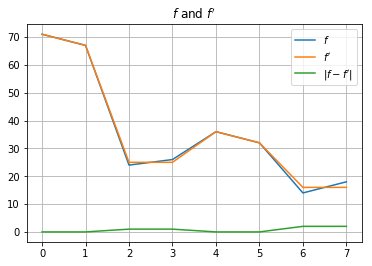

In [3]:
f = np.array([71,67,24,26,36,32,14,18])
f1 = np.array([71,67,25,25,36,32,16,16])
plt.plot(f, label="$f$")
plt.plot(f1,label="$f'$")
plt.plot(np.abs(f-f1), label="$|f-f'|$")
plt.legend()
plt.grid(True)
plt.title("$f$ and $f'$")
plt.show()


### The 1D Haar Wavelet

#### Exercise 2.1
Draw all box functions for vector-space $V_0$ and $V_1$:


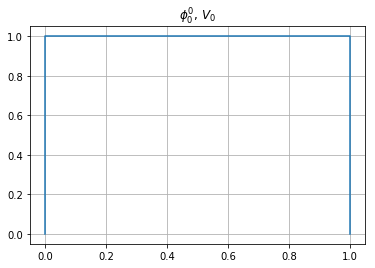

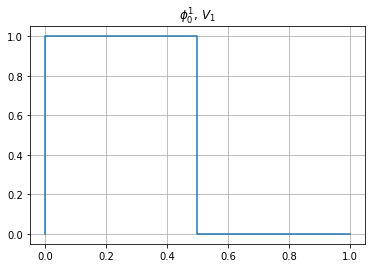

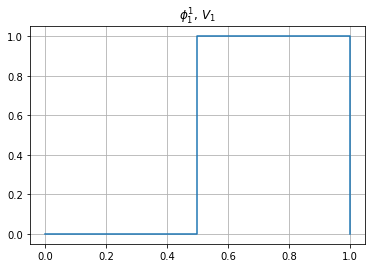

In [4]:
x = [0,0,1,1]
v0 = [0,1,1,0]
plt.plot(x,v0)
plt.grid(True)
plt.title("$\phi^0_0$, $V_0$")
x = [0,0,0.5,0.5,1,1]
v10 = [0,1,1,0,0,0]
v11 = [0,0,0,1,1,0]
plt.figure()
plt.title("$\phi^1_0$, $V_1$")
plt.plot(x,v10,label="$\phi^1_0$")
plt.grid(True)
plt.figure()
plt.title("$\phi^1_1$, $V_1$")
plt.plot(x,v11)
plt.grid(True)
plt.show()

#### Exercise 2.2 

Give the normalized coefficients of the Haar wavelet decomposition of $f(x)$ into $V_0$, $W_0$ and $W_1$:
$$\phi^0_0(x)= 1\phi(x)$$
$$\psi^0_0(x)=1\psi(x)$$
$$\psi^1_0(x)=\sqrt{2}\psi(2x)$$
$$\psi^1_1(x)=\sqrt{2}\psi(2x-1)$$

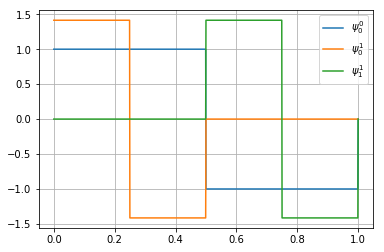

In [5]:
def _psi(x):
    if 0<=x<0.5:
        return 1
    if 0.5<=x<1:
        return -1
    else:
        return 0
psi = np.vectorize(_psi)
x = np.linspace(0,1,1001)
psi00 = psi(x)
psi10 = np.sqrt(2)*psi(2*x)
psi11 = np.sqrt(2)*psi(2*x-1)
plt.plot(x,psi00, label='$\psi_0^0$')
plt.plot(x,psi10, label='$\psi_0^1$')
plt.plot(x,psi11, label='$\psi_1^1$')
plt.grid(True)
plt.legend()
plt.show()

### Imaging

#### Exercise 3.1 

In this exercise I computed the *dwt* transform of *Cameraman.bmp* and display the four components:


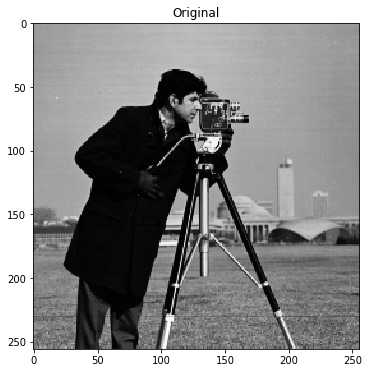

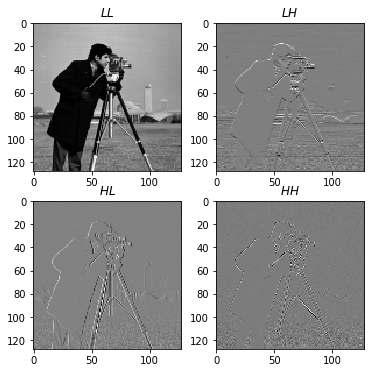

In [77]:
i = loadimg('Cameraman.bmp')
mpl.rcParams['figure.figsize']=(6.0,6.0)    #(6.0,4.0)

plt.title('Original')
plt.imshow(i, cmap="gray")
coeff = pywt.dwt2(i,'haar')
ll, (lh,hl,hh) = coeff


plt.figure()
plt.subplot(221)
plt.title('$LL$')
plt.imshow(ll,cmap="gray")
plt.subplot(222)
plt.title('$LH$')
plt.imshow(lh,cmap="gray")
plt.subplot(223)
plt.title('$HL$')
plt.imshow(hl,cmap="gray")
plt.subplot(224)
plt.title('$HH$')
plt.imshow(hh,cmap="gray")
plt.show()

#### Exercise 3.2 

Using the function *wavedec* is possible to compute the wavelet decomposition of the image. 
After computing the components we were asked to order it by magnetude:



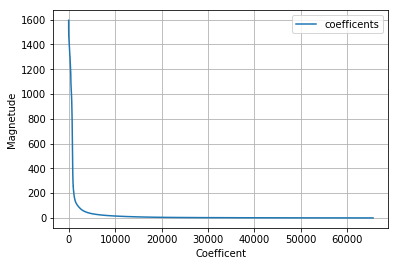

In [73]:
mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)

coeff = pywt.wavedec2(i, 'haar', level=3)
coeffs  =[]
for c in coeff:
    cc = np.array(c)
    cc = cc.reshape(-1)
    for j in range(0,len(cc)):
        coeffs.append(np.abs(cc[j]))
    
coeffs = np.sort(coeffs)[::-1]

plt.figure()
plt.plot(coeffs, label='coefficents')
plt.grid(True)
plt.legend()
plt.xlabel('Coefficent')
plt.ylabel('Magnetude')

plt.show()

Is very interesting to see that few components have most of the energy and information (around 10000) whil the most of the others have magentude around 0. 

#### Exercise 3.3

Using the information gatered previously I was able to compress (by nullify the value of some components) the image.
To do so first I decomposed the image, than I nullify each component lower than a fixed treshold $\tau$ that I fixed to 10 (after few tests):



Treshold: 10
percentual of zeros: 79.20%
PSNR: 39.36
MSE: 7.541


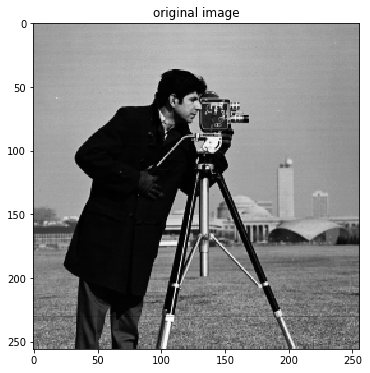

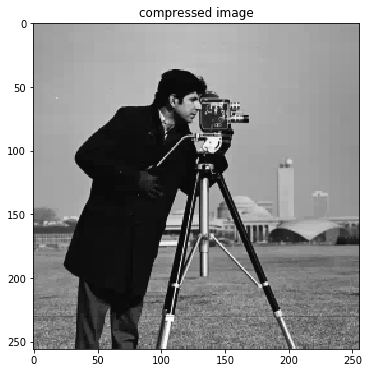

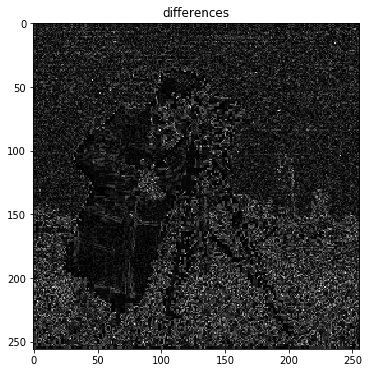

In [83]:
def compress(image, treshold):
    coeff = pywt.wavedec2(image, 'haar', level=3)
    coeffs = []
    zeros = 0
    total = 0
    for c in coeff:
        cc = np.array(c)
        shape = cc.shape
        cc = cc.reshape(-1)
        k = np.zeros(cc.shape)
        for j in range(0,len(cc)):
            if np.abs(cc[j])>=treshold:
                k[j]=cc[j]
            else:
                zeros += 1
            total += 1
        k = k.reshape(shape)
        coeffs.append(k)
    i2 = pywt.waverec2(coeffs,'haar')
    
    return i2, zeros/total

t = 10
i2, perc = compress(i,t)
print('Treshold: {}'.format(t))
print('percentual of zeros: {:.2f}%'.format(100*perc))
print('PSNR: {:.2f}'.format(psnr(i,i2)))
mpl.rcParams['figure.figsize']=(6.0,6.0)    #(6.0,4.0)
plt.figure()
plt.imshow(i,cmap='gray')
plt.title('original image')
plt.figure()
plt.title('compressed image')
plt.imshow(i2,cmap='gray')
plt.figure()
plt.title('differences')
plt.imshow(np.abs(i2-i),cmap='gray')

print('MSE: {:.3f}'.format(mse(i,i2)))
plt.show()


The results is very interesting, the recostructed image is very close to the original, with a $MSE=7.761$ and a $PSNR=39.23$. As possible to see in the previous figure the differnece is as well very small and mostly concented on the high-frequency areas. 

To understand better the quality and capacity of the compression I chose to variate the treshold from 1 to 1600 (with a step of 10) and plot the results:

In [104]:
ts = np.linspace(0.5,1650,200)
mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)

psnrs = []
percs = []
error = []
for t in ts:
    i2 , p= compress(i,t)
    psnrs.append(psnr(i,i2))
    percs.append(p*100)
    error.append(100*np.mean(np.abs(i-i2))/255)

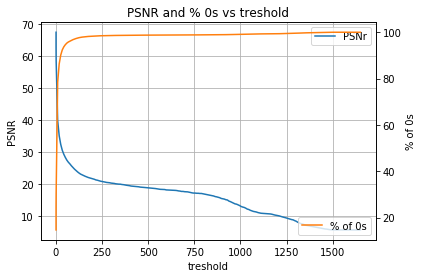

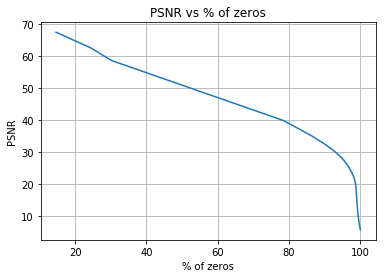

In [103]:
fig, ax1 = plt.subplots()
plt.title('PSNR and % 0s vs treshold')

ax1.plot(ts,psnrs, color='C0', label='PSNr')
ax2 = ax1.twinx()
ax2.plot(ts,percs, color='C1', label='% of 0s')
ax1.set_xlabel('treshold')
ax1.set_ylabel('PSNR')
ax2.set_ylabel('% of 0s')
plt.legend()
ax1.legend()
ax1.grid(True)
plt.figure()
plt.title('PSNR vs % of zeros')
plt.plot(percs,psnrs)
plt.xlabel('% of zeros')
plt.ylabel('PSNR')
plt.grid(True)
plt.show()

In the fist figure I plotted the *PSNR* and the percentage of nullified components against the treshold. 
The percentage of zeros reach values close to the 100% very quickly and at the same time the *PSNR* decrease at frist very quiclky and then more linearly. With a treshold 

For this reason the second plot is porbably more interesting as instead of using the treshold as $x$ axis I used the pecentage of zeros. 

In this way is possible to see that the *PSNR* decrease linearly with the percentage of zeros (as both have similar trend in the against the threshold) till 90% and the implode quickly.

This results is very good, as it told us that even with high compression 80-90% we can get a good quality image.
However I'm expecting some kind phase transition close to 0% of zeros to visualize it I chose to focus on the trehold range $\tau \in [0,0.5]$: 

In [121]:
ts = np.linspace(0,0.5,201)

mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)

psnrs = []
percs = []
error = []
for t in ts:
    i2 , p= compress(i,t)
    psnrs.append(psnr(i,i2))
    percs.append(p*100.0)


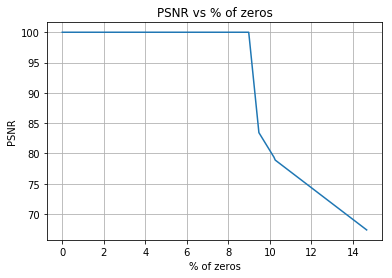

In [123]:

plt.figure()
plt.title('PSNR vs % of zeros')
plt.plot(percs,psnrs)
plt.xlabel('% of zeros')
plt.ylabel('PSNR')
plt.grid(True)
plt.show()

As expected with few percentage of zeros there is no relevant loss of information. The decrease of quality in the picture starts only from around 9% of zeros.